In [15]:
import polars as pl
import numpy as np
import re

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scripts import style
style.mpl_apply()

# Merge

In [17]:
path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
# pair_ohe = pl.read_parquet(path + "pair_ohe_full.parquet")

In [18]:
merge = pl.read_parquet(path + "merge_clean_df.parquet")

In [ ]:
# input: GENDER_CODE, disability, congenital_anomaly, other_medically_imp_cond, routeadmin_eng, unit_dose_qty, dose_unit_eng, indication_name_eng, active_ingredient_name, age_y, weight_kg, height_cm, hours_between_medicament
# output: SOC_NAME_ENG

merge

REPORT_ID,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_CODE,OUTCOME_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSAGEFORM_ENG,PT_NAME_ENG,SOC_NAME_ENG,INDICATION_NAME_ENG,ACTIVE_INGREDIENT_NAME,AGE_Y,WEIGHT_KG,HEIGHT_CM,hours_between_medicament
i64,i64,date,date,str,str,str,str,i8,i8,i8,i8,i8,i8,str,str,str,str,str,f64,str,str,str,str,str,str,f64,f64,f64,f64
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Infection""","""Infections and infestations""","""Infection""","""cefazolin""",57.0,93.2,null,null
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Rash""","""Skin and subcutaneous tissue d…","""Infection""","""cefazolin""",57.0,93.2,null,null
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Cyanosis""","""Vascular disorders""","""Infection""","""cefazolin""",57.0,93.2,null,null
303952,303952,2008-05-22,2008-05-22,"""Published""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME FOR INJECTION USP""","""Suspect""","""Intravenous (not otherwise spe…",150.0,"""mg/kg""","""POWDER FOR SOLUTION INTRAMUSCU…","""Pneumonia necrotising""","""Infections and infestations""","""Infection""","""cefuroxime""",3.0,null,null,24.0
303952,303952,2008-05-22,2008-05-22,"""Published""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME FOR INJECTION USP""","""Suspect""","""Intravenous (not otherwise spe…",150.0,"""mg/kg""","""POWDER FOR SOLUTION INTRAMUSCU…","""Pneumonia necrotising""","""Infections and infestations""","""Infection""","""cefuroxime salt not specified""",3.0,null,null,24.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Drug hypersensitivity""","""Immune system disorders""","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Chest pain""","""General disorders and administ…","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Asthma""","""Respiratory, thoracic and medi…","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0


In [16]:
Genero

NameError: name 'Genero' is not defined

In [29]:
drugnames = merge['SOC_NAME_ENG'].unique()
drugnames = drugnames.sort()
drugnames = drugnames.to_frame()
drugnames.write_csv("unique_soc_name_eng.csv", include_header=True)

In [6]:
active_ingredients = merge['ACTIVE_INGREDIENT_NAME'].unique()
active_ingredients = active_ingredients.sort()
active_ingredients = active_ingredients.to_frame()
active_ingredients.write_csv("unique_active_ingredients.csv", include_header=True)

In [7]:
CEPH_GEN = {
    "cefaclor": "2/3 gen",
    "cefaclor monohydrate": "2/3 gen",
    "cefadroxil": "1st gen",
    "cefadroxil monohydrate": "1st gen",
    "cefalexin": "1st gen",
    "cefalexin sodium": "1st gen",
    "cefatrizine": "2/3 gen",
    "cefazolin": "1st gen",
    "cefazolin benzathine": "1st gen",
    "cefazolin sodium": "1st gen",
    "cefazolin, sodium": "1st gen",
    "cefazoline benzathine": "1st gen",
    "cefcapene": "2/3 gen",
    "cefcapene pivoxil": "2/3 gen",
    "cefcapene pivoxil hcl": "2/3 gen",
    "cefcapene pivoxil hydrochloride": "2/3 gen",
    "cefcapene pivoxil hydrochloride hydrate": "2/3 gen",
    "cefdinir": "2/3 gen",
    "cefepim": "4/5 gen",
    "cefepime": "4/5 gen",
    "cefepime dihydrochloride monohydrate": "4/5 gen",
    "cefepime hcl": "4/5 gen",
    "cefepime hydrochloride": "4/5 gen",
    "cefepime hydrochloride monohydrate": "4/5 gen",
    "cefepime, hydrochloride, monohydrate": "4/5 gen",
    "cefixima": "2/3 gen",
    "cefixime": "2/3 gen",
    "cefixime trihydrate": "2/3 gen",
    "cefmetazole sodium": "2/3 gen",
    "cefodizime": "2/3 gen",
    "cefodizime disodium": "2/3 gen",
    "cefodizime sodium": "2/3 gen",
    "cefoperazone sodium": "2/3 gen",
    "cefotaxime": "2/3 gen",
    "cefotaxime sodique": "2/3 gen",
    "cefotaxime sodium": "2/3 gen",
    "cefotiam": "2/3 gen",  # treated as 2nd/3rd bucket
    "cefotiam hexetil hydrochloride": "2/3 gen",
    "cefotiam hydrochloride": "2/3 gen",
    "cefoxitin": "2/3 gen",
    "cefoxitin sodium": "2/3 gen",
    "cefpodoxime proxetil": "2/3 gen",
    "cefprozil": "2/3 gen",
    "cefprozil monohydrate": "2/3 gen",
    "ceftaroline": "4/5 gen",
    "ceftaroline fosamil": "4/5 gen",
    "ceftaroline fosamil acetate": "4/5 gen",
    "ceftazidime": "2/3 gen",
    "ceftazidime pentahydrate": "2/3 gen",
    "ceftazidime sodium": "2/3 gen",
    "ceftobiprole": "4/5 gen",
    "ceftolozane": "4/5 gen",
    "ceftolozane sulfate": "4/5 gen",
    "ceftriaxone": "2/3 gen",
    "ceftriaxone disodium": "2/3 gen",
    "ceftriaxone sodique": "2/3 gen",
    "ceftriaxone sodium": "2/3 gen",
    "ceftriaxone sodium hydrate": "2/3 gen",
    "ceftriaxone sodium sesquaterhydrate": "2/3 gen",
    "ceftriaxone, sodium, sesquaterhydrate": "2/3 gen",
    "cefuroxime": "2/3 gen",
    "cefuroxime axetil": "2/3 gen",
    "cefuroxime salt not specified": "2/3 gen",
    "cefuroxime sodium": "2/3 gen",
    "cephalexin": "1st gen",
    "cephazolin sodium": "1st gen",
    "methylol cefalexin lysinate": "1st gen",
    "probenecid": "other",
    "sodium cefazolin": "1st gen",
    "sodium ceforoxine": "2/3 gen",  # likely cefuroxime → 2nd-gen bucket
    "sodium cefoxitin": "2/3 gen",
    "sodium ceftriaxone": "2/3 gen",
    "tazobactam": "other",
    "tazobactam sodique": "other",
    "tazobactam sodium": "other",
}

def cephalosporin_generation(name: str) -> str:
    """
    Map ACTIVE_INGREDIENT_NAME to cephalosporin generation bucket.

    Parameters
    ----------
    name : str
        Raw ACTIVE_INGREDIENT_NAME value.

    Returns
    -------
    str
        One of {"1st gen", "2/3 gen", "4/5 gen", "other"}.
    """
    if name is None:
        return "other"
    key = name.strip().lower()
    return CEPH_GEN.get(key, "other")


In [8]:
import polars as pl

# clean name once
clean_name = (
    pl.col("ACTIVE_INGREDIENT_NAME")
      .cast(pl.Utf8)
      .str.to_lowercase()
      .str.strip_chars()
)

merge = merge.with_columns(
    ceph_gen=clean_name.replace(CEPH_GEN).fill_null("other")
)


In [9]:
# save to data/processed/Canada Vigilance Adverse Reaction Online Database/merge_clean_df_cephgens.parquet
merge.write_parquet("data/processed/Canada Vigilance Adverse Reaction Online Database/merge_clean_df_cephgens.parquet")

merge

REPORT_ID,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_CODE,OUTCOME_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSAGEFORM_ENG,PT_NAME_ENG,SOC_NAME_ENG,INDICATION_NAME_ENG,ACTIVE_INGREDIENT_NAME,AGE_Y,WEIGHT_KG,HEIGHT_CM,hours_between_medicament,ceph_gen
i64,i64,date,date,str,str,str,str,i8,i8,i8,i8,i8,i8,str,str,str,str,str,f64,str,str,str,str,str,str,f64,f64,f64,f64,str
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Infection""","""Infections and infestations""","""Infection""","""cefazolin""",57.0,93.2,null,null,"""1st gen"""
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Rash""","""Skin and subcutaneous tissue d…","""Infection""","""cefazolin""",57.0,93.2,null,null,"""1st gen"""
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Cyanosis""","""Vascular disorders""","""Infection""","""cefazolin""",57.0,93.2,null,null,"""1st gen"""
303952,303952,2008-05-22,2008-05-22,"""Published""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME FOR INJECTION USP""","""Suspect""","""Intravenous (not otherwise spe…",150.0,"""mg/kg""","""POWDER FOR SOLUTION INTRAMUSCU…","""Pneumonia necrotising""","""Infections and infestations""","""Infection""","""cefuroxime""",3.0,null,null,24.0,"""2/3 gen"""
303952,303952,2008-05-22,2008-05-22,"""Published""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME FOR INJECTION USP""","""Suspect""","""Intravenous (not otherwise spe…",150.0,"""mg/kg""","""POWDER FOR SOLUTION INTRAMUSCU…","""Pneumonia necrotising""","""Infections and infestations""","""Infection""","""cefuroxime salt not specified""",3.0,null,null,24.0,"""2/3 gen"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Drug hypersensitivity""","""Immune system disorders""","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0,"""1st gen"""
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Chest pain""","""General disorders and administ…","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0,"""1st gen"""
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Asthma""","""Respiratory, thoracic and medi…","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0,"""1st gen"""


# Dates

In [16]:
# seect REPORT_ID and DATRECEIVED
data = merge.select(["REPORT_ID", "DATRECEIVED"])
# keep only the first reprort_id if there are multiple
data = data.unique(subset=["REPORT_ID"])
# dota sort by DATRECEIVED
data = data.sort("DATRECEIVED")
data

REPORT_ID,DATRECEIVED
i64,date
309742,2007-08-07
226315,2007-12-03
300863,2008-01-08
300609,2008-01-17
301943,2008-01-18
…,…
908148234,2025-06-27
1154782,2025-06-27
907613975,2025-06-29


In [12]:
# get the distribution of DATERECEIVED by year, right now they are in YYYMMDD format
dates = data.select("DATRECEIVED").to_series().to_list()
years = [int(str(date)[:4]) for date in dates]
year_counts = np.unique(years, return_counts=True)
year_counts

(array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]),
 array([  2, 105, 107, 126,  88, 120, 165, 158, 139, 154, 233, 281, 599,
        549, 527, 582, 582, 614, 356]))

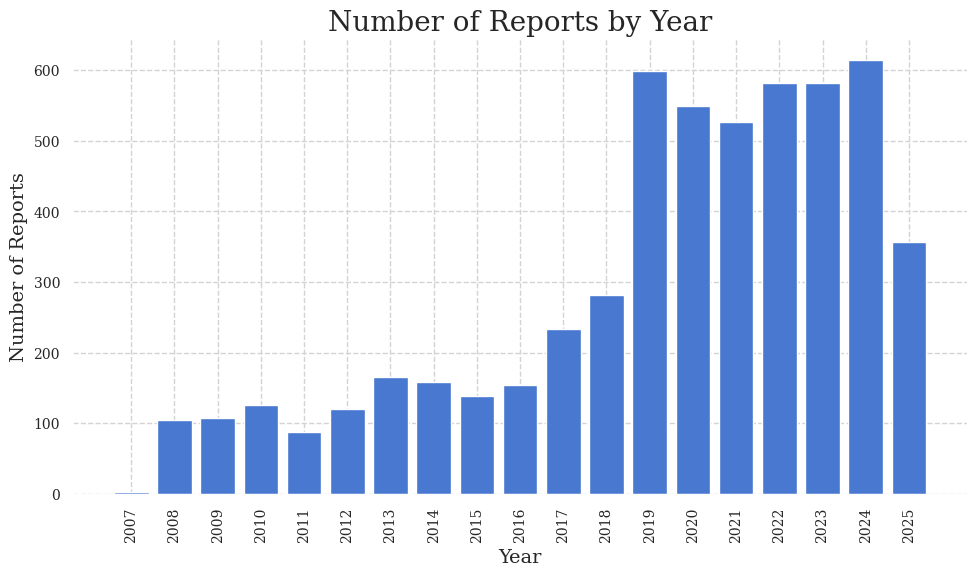

In [13]:
# plot the year counts
plt.figure(figsize=(10, 6))
plt.bar(year_counts[0], year_counts[1])
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.xticks(year_counts[0], rotation=90)
plt.title("Number of Reports by Year")
plt.savefig('visualizations/canada/00_05.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

# Patients with AERs

In [ ]:
import polars as pl

path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
merge = pl.read_parquet(path + "merge_clean_df_cephgens.parquet")

columns = [
    "REPORT_ID", 
    "GENDER_CODE",
    "DISABILITY",
    "CONGENITAL_ANOMALY",
    "OTHER_MEDICALLY_IMP_COND",
    "AGE_Y",
    "WEIGHT_KG",
    "HEIGHT_CM"]


# keep the first one 
patients = merge.unique(subset=["REPORT_ID"]).select(columns)
patients = patients.sort("REPORT_ID")
patients.write_parquet(path + "patients.parquet")
patients

In [ ]:
# import polars as pl




# path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
# merge = pl.read_parquet(path + "merge_clean_df.parquet")

# columns = [
#     "REPORT_ID", 
#     "GENDER_CODE",
#     "DISABILITY",
#     "CONGENITAL_ANOMALY",
#     "OTHER_MEDICALLY_IMP_COND",
#     "AGE_Y",
#     "WEIGHT_KG",
#     "HEIGHT_CM"]


# # keep the first one 
# patients = merge.unique(subset=["REPORT_ID"])
# patients = patients.sort("REPORT_ID")
# patients.write_parquet(path + "patients_full.parquet")
# patients

REPORT_ID,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_CODE,OUTCOME_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSAGEFORM_ENG,PT_NAME_ENG,SOC_NAME_ENG,INDICATION_NAME_ENG,ACTIVE_INGREDIENT_NAME,AGE_Y,WEIGHT_KG,HEIGHT_CM,hours_between_medicament
i64,i64,date,date,str,str,str,str,i8,i8,i8,i8,i8,i8,str,str,str,str,str,f64,str,str,str,str,str,str,f64,f64,f64,f64
142588,142588,2015-12-11,2001-09-18,"""Published""","""F""","""Recovered/resolved""","""Serious""",2,2,2,2,1,1,"""Other health professional""","""MAH""","""CEFAZOLIN""","""Concomitant""","""Unknown""",4.0,"""Gram""","""""","""Neuropathy peripheral""","""Nervous system disorders""","""Sepsis""","""cefazolin""",69.0,null,null,null
182749,182749,2011-06-27,2005-04-15,"""Study""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Pharmacist""","""MAH""","""CEFOTAXIME""","""Drug used to treat AE""","""Intravenous (not otherwise spe…",null,"""""","""Injection""","""Depressed level of consciousne…","""Nervous system disorders""","""Delusional disorder, unspecifi…","""cefotaxime""",86.0,null,null,null
195272,195272,2009-07-06,2005-12-27,"""Study""","""M""","""Unknown""","""Serious""",null,null,null,null,1,null,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Concomitant""","""Unknown""",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Haemoglobin decreased""","""Investigations""","""Renal transplant""","""cefazolin""",53.0,null,null,null
203481,203481,2009-06-26,2006-06-26,"""Spontaneous""","""M""","""Fatal""","""Serious""",1,1,null,1,1,1,"""Consumer/other non health prof…","""Community""","""CEFTIN - TAB 250MG""","""Concomitant""","""Unknown""",null,"""""","""Tablets""","""Blood pressure abnormal""","""Investigations""","""Blood pressure increased""","""cefuroxime""",61.0,72.574779,182.88,null
210335,210335,2009-03-18,2006-12-04,"""Published""","""M""","""Recovered/resolved""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Concomitant""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Agitation""","""Psychiatric disorders""","""Antibiotic prophylaxis""","""cefazolin""",28.0,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
908137781,null,2025-06-24,2025-06-24,"""Spontaneous""","""F""","""Unknown""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFUROXIME SODIUM""","""Concomitant""","""Unknown""",null,"""""","""""","""Off label use""","""Injury, poisoning and procedur…","""Product used for unknown indic…","""cefuroxime sodium""",41.0,null,null,null
908140366,null,2025-06-25,2025-06-25,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL MONOHYDRATE""","""Concomitant""","""Unknown""",null,"""""","""""","""Oedema""","""General disorders and administ…","""Product used for unknown indic…","""cefadroxil monohydrate""",65.0,34.0,null,null
908142798,null,2025-06-25,2025-06-25,"""Spontaneous""","""M""","""Recovered/resolved""","""Serious""",2,2,2,2,1,2,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME AXETIL""","""Suspect""","""Unknown""",null,"""""","""NOT SPECIFIED""","""Diarrhoea""","""Gastrointestinal disorders""","""Nasal polyps""","""cefuroxime axetil""",59.0,null,null,null


In [24]:
import polars as pl
path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
patients = pl.read_parquet(path + "patients.parquet")
patients.head(3)

REPORT_ID,GENDER_CODE,DISABILITY,CONGENITAL_ANOMALY,OTHER_MEDICALLY_IMP_COND,AGE_Y,WEIGHT_KG,HEIGHT_CM
i64,str,i8,i8,i8,f64,f64,f64
142588,"""F""",2,2,1,69.0,null,null
182749,"""F""",null,null,null,86.0,null,null
195272,"""M""",null,null,null,53.0,null,null


In [23]:
import polars as pl
path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
patients_full = pl.read_parquet(path + "patients_full.parquet")
patients_full.head(3)

REPORT_ID,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_CODE,OUTCOME_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSAGEFORM_ENG,PT_NAME_ENG,SOC_NAME_ENG,INDICATION_NAME_ENG,ACTIVE_INGREDIENT_NAME,AGE_Y,WEIGHT_KG,HEIGHT_CM,hours_between_medicament
i64,i64,date,date,str,str,str,str,i8,i8,i8,i8,i8,i8,str,str,str,str,str,f64,str,str,str,str,str,str,f64,f64,f64,f64
142588,142588,2015-12-11,2001-09-18,"""Published""","""F""","""Recovered/resolved""","""Serious""",2,2,2,2,1,1,"""Other health professional""","""MAH""","""CEFAZOLIN""","""Concomitant""","""Unknown""",4.0,"""Gram""","""""","""Neuropathy peripheral""","""Nervous system disorders""","""Sepsis""","""cefazolin""",69.0,null,null,null
182749,182749,2011-06-27,2005-04-15,"""Study""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Pharmacist""","""MAH""","""CEFOTAXIME""","""Drug used to treat AE""","""Intravenous (not otherwise spe…",null,"""""","""Injection""","""Depressed level of consciousne…","""Nervous system disorders""","""Delusional disorder, unspecifi…","""cefotaxime""",86.0,null,null,null
195272,195272,2009-07-06,2005-12-27,"""Study""","""M""","""Unknown""","""Serious""",null,null,null,null,1,null,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Concomitant""","""Unknown""",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Haemoglobin decreased""","""Investigations""","""Renal transplant""","""cefazolin""",53.0,null,null,null


# OHES

In [ ]:
import polars as pl
path = "data/processed/"
socs = pl.read_parquet(path + "soc_ohe.parquet").sort("REPORT ID")
pts = pl.read_parquet(path + "pt_ohe.parquet").sort("REPORT ID")
inds = pl.read_parquet(path + "indication_ohe.parquet").sort("REPORT ID")
ings = pl.read_parquet(path + "activeingredient_ohe.parquet").sort("REPORT ID")

In [13]:
socs.head(3)

REPORT ID,Gastrointestinal disorders,Infections and infestations,Investigations,Musculoskeletal and connective tissue disorders,Immune system disorders,Renal and urinary disorders,Injury poisoning and procedural complications,Respiratory thoracic and mediastinal disorders,Pregnancy puerperium and perinatal conditions,General disorders and administration site conditions,Skin and subcutaneous tissue disorders,Cardiac disorders,Surgical and medical procedures,Blood and lymphatic system disorders,Vascular disorders,Metabolism and nutrition disorders,Neoplasms benign malignant and unspecified incl cysts and polyps,Endocrine disorders,Nervous system disorders,Eye disorders,Product issues,Psychiatric disorders,Ear and labyrinth disorders,Hepatobiliary disorders,Social circumstances,Congenital familial and genetic disorders,Reproductive system and breast disorders,UNK
i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
142588,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0
182749,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
195272,1,1,1,1,1,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
pts.head(3)

REPORT ID,Drug hypersensitivity,Paraesthesia,Malaise,Sepsis,Death,Clostridium difficile infection,Granulomatosis with polyangiitis,Pain management,Wheezing,Bacterial infection,Pseudomonal bacteraemia,Arteriosclerosis coronary artery,Anuria,Cellulitis,Asthenia,Thrombocytopenic purpura,Urticaria,Platelet count increased,Abdominal discomfort,Rotator cuff syndrome,Second primary malignancy,Oral pruritus,Cerebrovascular disorder,Vomiting,Asthma,Dizziness,Off label use,Chills,Joint stiffness,Acute kidney injury,Pulmonary mass,Drug interaction,Intentional product misuse,Heart rate increased,Aplastic anaemia,General physical health deterioration,…,Stasis dermatitis,Dysmorphism,Pulmonary resection,Transferrin decreased,Tracheal stenosis,Lymphocyte percentage abnormal,Myoglobin urine present,Coeliac disease,Cutaneous calcification,Pustular psoriasis,Dose calculation error,Blood sodium abnormal,Posturing,Renal aneurysm,Pharyngo oesophageal diverticulum,Delusion of parasitosis,Pulmonary sepsis,Paresis,Renal hypoplasia,Idiopathic angioedema,Conjunctival erosion,Perinatal depression,Apathy,Acute myeloid leukaemia refractory,Sinus headache,Drug chemical incompatibility,Tendon discomfort,Drug tolerance,Gastric antral vascular ectasia,Implant site inflammation,Listeriosis,Increased dose administered,Orchitis,Fontanelle bulging,Oral mucosal erythema,Lupus vulgaris,Wound treatment
i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,…,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
142588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
inds.head(3)

REPORT ID,Rheumatoid arthritis,Muscle spasms,Sepsis,Sleep disorder therapy,Infection prophylaxis,Product used for unknown indication,Atrial fibrillation,Encephalitis,Infection,Pneumonia,Preterm premature rupture of membranes,Bacillus infection,Chronic obstructive pulmonary disease,Cellulitis,Gastrooesophageal reflux disease,Asthma,Osteoporosis,Iron deficiency,Immunosuppressant drug therapy,Sedative therapy,Chlamydial infection,Neuralgia,Enterovirus infection,Staphylococcal bacteraemia,Bone marrow transplant,Back pain,Stem cell transplant,Thrombosis,COVID 19 immunisation,Vitamin supplementation,Cardiogenic shock,Myalgia,Mineral supplementation,Influenza,Headache,Urinary tract infection,…,Cardiac amyloidosis,Ovarian epithelial cancer,Haemodialysis,Endoscopic retrograde cholangiopancreatography,Adenocarcinoma pancreas,Cataract,Ovarian epithelial cancer recurrent,Lung consolidation,Organ transplant,Hypoglycaemia,Blood osmolarity,Venoocclusive disease,Cardiac flutter,Cerebral venous thrombosis,Labour augmentation,Autonomic nervous system imbalance,Bruton s agammaglobulinaemia,Oesophagectomy,Croup infectious,Ventricular drainage,Splinter,Antiplatelet therapy,Restlessness,Mucopolysaccharidosis II,Parophthalmia,Influenza A virus test positive,Brain empyema,Erythrodermic atopic dermatitis,Febrile infection,Enema administration,Skin discolouration,Tongue oedema,Lactobacillus infection,Polyarteritis nodosa,Skin induration,Lung squamous cell carcinoma stage III,Pelvic abscess
i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,…,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
142588,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
ings.head(3)

REPORT ID,cefixima,ceftriaxone sodique,ceftriaxone,ceftriaxone disodium,cefazolin,cefadroxil,cephazolin sodium,cefodizime sodium,ceftriaxone sodium sesquaterhydrate,cefprozil,cefotaxime,ceftriaxone sodium,sodium cefazolin,cefuroxime salt not specified,cefuroxime,cefixime trihydrate,sodium ceftriaxone,ceftriaxone sodium hydrate,cefixime,cefazolin sodium,cefalexin,ceftazidime,cefazoline benzathine,cefazolin sodium 1,cefaclor,cefuroxime sodium,cefotaxime sodium,ceftriaxone sodium sesquaterhydrate 1,cefazolin benzathine,cefaclor monohydrate,ceftaroline,cefoxitin,cefatrizine,cefuroxime axetil,cefcapene pivoxil hydrochloride,ceftazidime pentahydrate,…,cefcapene pivoxil hydrochloride hydrate,cefcapene pivoxil,cefotaxime sodique,cefepime dihydrochloride monohydrate,ceftaroline fosamil,sodium ceforoxine,sodium cefoxitin,cefepim,cefprozil monohydrate,cefepime,ceftobiprole,cefdinir,cefadroxil monohydrate,cefpodoxime proxetil,cefepime hydrochloride,ceftaroline fosamil acetate,cefcapene pivoxil hcl,cefepime hydrochloride monohydrate,cephalexin,ceftolozane sulfate,cefalexin sodium,cefoxitin sodium,cefodizime,cefepime hcl,cefoperazone sodium,cefotiam hexetil hydrochloride,probenecid,methylol cefalexin lysinate,tazobactam,cefepime hydrochloride monohydrate 1,ceftolozane,cefotiam,cefmetazole sodium,cefotiam hydrochloride,cefodizime disodium,tazobactam sodium,tazobactam sodique
i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,…,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
142588,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182749,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195272,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Canada Census

In [1]:
import polars as pl
canada2016 = pl.read_parquet("data/processed/canada_census_2016.parquet")
canada2021 = pl.read_parquet("data/processed/canada_census_2021.parquet")

In [2]:
# drop Geo, and last column
canada2016 = canada2016.drop(["Geo", canada2016.columns[-1]])
canada2021 = canada2021.drop(["Geo", canada2021.columns[-1]])

In [3]:
canada2021

Reference Period,Census Year,Age,Total,Men,Women
i64,i64,i64,f64,f64,f64
2021,2021,1,355385.0,181860.0,173525.0
2021,2021,2,365325.0,186860.0,178465.0
2021,2021,3,377035.0,193235.0,183800.0
2021,2021,4,390315.0,200445.0,189870.0
2021,2021,5,402100.0,205950.0,196155.0
…,…,…,…,…,…
2021,2021,95,25450.0,7240.0,18205.0
2021,2021,96,16320.0,4250.0,12070.0
2021,2021,97,12125.0,2940.0,9185.0


In [4]:
import math

# make an exponential interpolation 

# Reference Period	Census Year	Age	Total	Men	Women
# i64	i64	i64	f64	f64	f64
# 2021	2021	1	355385.0	181860.0	173525.0
# 2021	2021	2	365325.0	186860.0	178465.0
# 2021	2021	3	377035.0	193235.0	183800.0
# 2021	2021	4	390315.0	200445.0	189870.0

ages = canada2016.select("Age").to_series().to_list()
total_2016 = canada2016.select("Total").to_series().to_list()
total_2021 = canada2021.select("Total").to_series().to_list()   
men_2016 = canada2016.select("Men").to_series().to_list()
men_2021 = canada2021.select("Men").to_series().to_list()
women_2016 = canada2016.select("Women").to_series().to_list()
women_2021 = canada2021.select("Women").to_series().to_list()
total_interp = []
men_interp = []
women_interp = []
for i in range(len(ages)):
    age = ages[i]
    t2016 = total_2016[i]
    t2021 = total_2021[i]
    m2016 = men_2016[i]
    m2021 = men_2021[i]
    w2016 = women_2016[i]
    w2021 = women_2021[i]
    # Calculate exponential growth rates
    if t2016 > 0 and t2021 > 0:
        r_total = math.log(t2021 / t2016) / 5
    else:
        r_total = 0
    if m2016 > 0 and m2021 > 0:
        r_men = math.log(m2021 / m2016) / 5
    else:
        r_men = 0
    if w2016 > 0 and w2021 > 0:
        r_women = math.log(w2021 / w2016) / 5
    else:
        r_women = 0
    for year in range(2016, 2025):
        total_value = t2016 * math.exp(r_total * (year - 2016))
        men_value = m2016 * math.exp(r_men * (year - 2016))
        women_value = w2016 * math.exp(r_women * (year - 2016))
        total_interp.append((year, age, total_value))
        men_interp.append((year, age, men_value))
        women_interp.append((year, age, women_value))
canada_interp_total = pl.DataFrame(total_interp, schema=["Census Year", "Age", "Total"])
canada_interp_men = pl.DataFrame(men_interp, schema=["Census Year", "Age", "Men"])
canada_interp_women = pl.DataFrame(women_interp, schema=["Census Year", "Age", "Women"])
canada_interp_total

C:\Users\herie\AppData\Local\Temp\ipykernel_20036\2215237357.py:50: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  canada_interp_total = pl.DataFrame(total_interp, schema=["Census Year", "Age", "Total"])
C:\Users\herie\AppData\Local\Temp\ipykernel_20036\2215237357.py:51: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  canada_interp_men = pl.DataFrame(men_interp, schema=["Census Year", "Age", "Men"])
C:\Users\herie\AppData\Local\Temp\ipykernel_20036\2215237357.py:52: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  canada_interp_women = pl.DataFrame(women_interp, schema=["Census Year", "Age", "Women"])


Census Year,Age,Total
i64,i64,f64
2016,1,372615.0
2017,1,369103.434027
2018,1,365624.96145
2019,1,362179.270392
2020,1,358766.051917
…,…,…
2020,99,5617.91411
2021,99,5940.0
2022,99,6280.551697


In [43]:
canada_interp_men

Census Year,Age,Men
i64,i64,f64
2016,1,190900.0
2017,1,189056.746617
2018,1,187231.290945
2019,1,185423.461136
2020,1,183633.087003
…,…,…
2020,99,1183.871818
2021,99,1275.0
2022,99,1373.142747


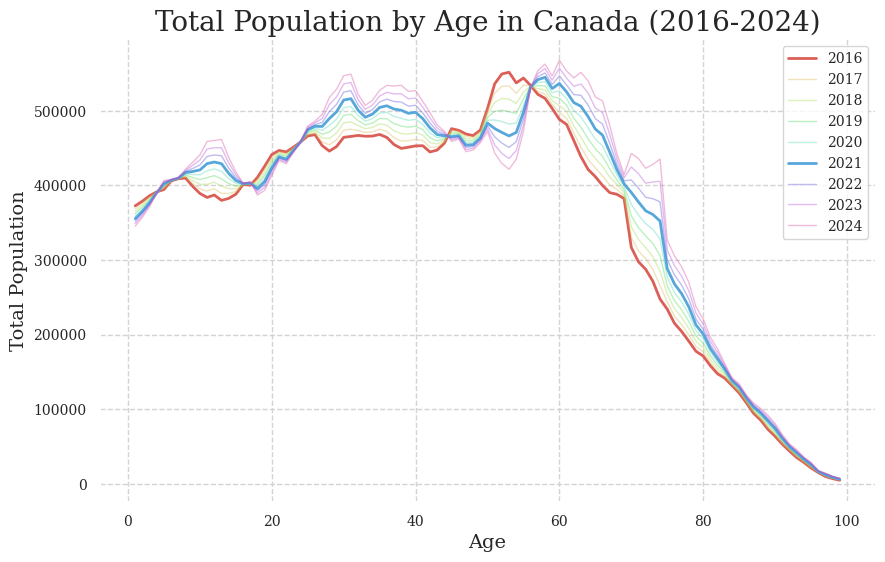

In [47]:
# plot the interpolated total population by age for years 2016 to 2024
# use palette hls from seaborn
palette = sns.color_palette("hls", 9)

plt.figure(figsize=(10, 6))
for year in range(2016, 2025):  
    if year == 2016 or year == 2021:
        alpha = 1.0
    else:
        alpha = 0.4
    data_year = canada_interp_total.filter(pl.col("Census Year") == year)
    ages = data_year.select("Age").to_series().to_list()
    totals = data_year.select("Total").to_series().to_list()
    plt.plot(ages, totals, label=str(year), alpha=alpha, color=palette[year - 2016], linewidth=2 if year in [2016, 2021] else 1)
plt.xlabel("Age")
plt.ylabel("Total Population")
plt.title("Total Population by Age in Canada (2016-2024)")
plt.legend()
plt.savefig('visualizations/canada/01_06.pdf', bbox_inches='tight')
plt.show()

2021
2022
2023
2024


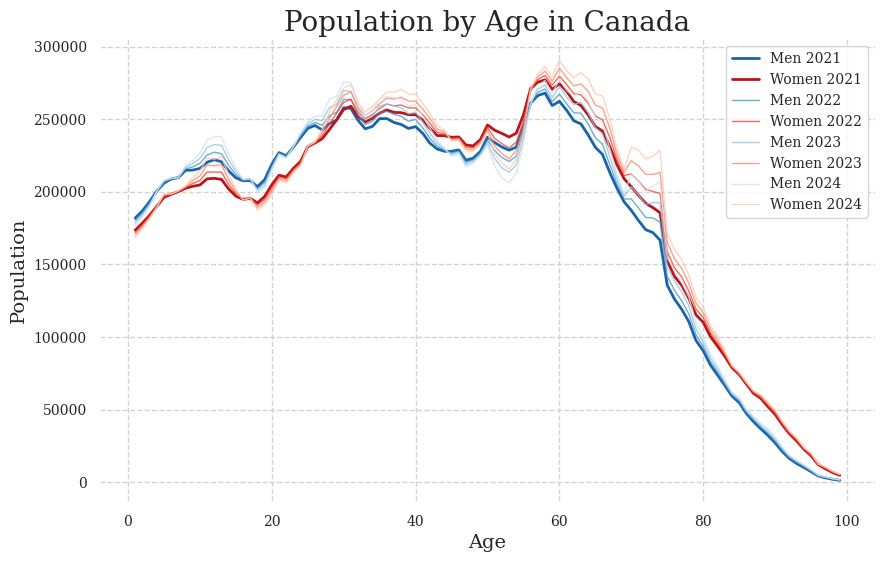

In [68]:
# plot the interpolated total population by age for years 2016 to 2024
# use blue palette for men and red palette for women
men_palette = sns.color_palette("Blues_r", 4)
women_palette = sns.color_palette("Reds_r", 4)

plt.figure(figsize=(10, 6))
for year in range(2021, 2025):  
    print(year)
    if year == 2021:
        alpha = 1
        linewidth = 2
    else:
        alpha = 0.8
        linewidth = 1
    data_year = canada_interp_men.filter(pl.col("Census Year") == year)
    ages = data_year.select("Age").to_series().to_list()
    totals = data_year.select("Men").to_series().to_list()
    plt.plot(ages, totals, label=f"Men {year}", alpha=alpha, color=men_palette[year - 2021], linewidth=linewidth)
    data_year_women = canada_interp_women.filter(pl.col("Census Year") == year)
    ages_women = data_year_women.select("Age").to_series().to_list()
    totals_women = data_year_women.select("Women").to_series().to_list()
    plt.plot(ages_women, totals_women, label=f"Women {year}", alpha=alpha, color=women_palette[year - 2021], linewidth=linewidth)
plt.xlabel("Age")
plt.ylabel("Population")
plt.title("Population by Age in Canada")
plt.legend()
plt.savefig('visualizations/canada/01_08.pdf', bbox_inches='tight')
plt.show()

# Prescriptions 

In [5]:
import pandas as pd
cefs = pd.read_csv("data/processed/cephalosporins_canada.csv")
cefs

,Antimicrobial_Class,Year,Canada_DDD,Canada_Prescriptions
0,1st gen cephalosporins,2021,1529.37,210.75
1,1st gen cephalosporins,2022,1499.57,209.04
2,1st gen cephalosporins,2023,1538.61,219.01
3,1st gen cephalosporins,2024,1556.29,224.33
4,2/3rd gen cephalosporins,2021,493.13,58.05
5,2/3rd gen cephalosporins,2022,584.43,71.05
6,2/3rd gen cephalosporins,2023,691.32,82.87
7,2/3rd gen cephalosporins,2024,683.02,81.60
8,4/5th gen cephalosporins,2021,0.21,0.04
9,4/5th gen cephalosporins,2022,0.26,0.04


In [7]:
total_population_per_year = pl.DataFrame({
    "Year": list(range(2021, 2025)),
    "Total_Population": [total_population_per_year[year] for year in range(2021, 2025)]
})
total_population_per_year


Year,Total_Population
i64,f64
2021,3.6639335e7
2022,3.7061e7
2023,3.7500e7
2024,3.7957e7


In [13]:
# transpose cefs
cefs_transposed = cefs.set_index('Year').T.reset_index()
cefs_transposed

Year,index,2021,2022,2023,2024,2021,2022,2023,2024,2021,2022,2023,2024
0,Antimicrobial_Class,1st gen cephalosporins,1st gen cephalosporins,1st gen cephalosporins,1st gen cephalosporins,2/3rd gen cephalosporins,2/3rd gen cephalosporins,2/3rd gen cephalosporins,2/3rd gen cephalosporins,4/5th gen cephalosporins,4/5th gen cephalosporins,4/5th gen cephalosporins,4/5th gen cephalosporins
1,Canada_DDD,1529.37,1499.57,1538.61,1556.29,493.13,584.43,691.32,683.02,0.21,0.26,0.49,0.51
2,Canada_Prescriptions,210.75,209.04,219.01,224.33,58.05,71.05,82.87,81.6,0.04,0.04,0.07,0.08


In [ ]:
# get the total prescriptions = cefs['Canada_Prescriptions']*1000 * total_population_per_year

total_prescriptions = pd.DataFrame()
# make the
for year in range(2021, 2025):

,2021,2022,2023,2024
0,7.721740e+12,7.810629e+12,7.903183e+12,7.999517e+12
1,7.659087e+12,7.747255e+12,7.839057e+12,7.934610e+12
2,8.024381e+12,8.116754e+12,8.212935e+12,8.313045e+12
3,8.219302e+12,8.313919e+12,8.412436e+12,8.514979e+12
4,2.126913e+12,2.151397e+12,2.176891e+12,2.203426e+12
5,2.603225e+12,2.633192e+12,2.664394e+12,2.696872e+12
6,3.036302e+12,3.071254e+12,3.107648e+12,3.145528e+12
7,2.989770e+12,3.024187e+12,3.060022e+12,3.097322e+12
8,1.465573e+09,1.482444e+09,1.500011e+09,1.518295e+09
9,1.465573e+09,1.482444e+09,1.500011e+09,1.518295e+09
